## Streamlining workflows with pipelines:

the Pipeline class in scikit-learn. It allows us
to fit a model including an arbitrary number of transformation steps and apply it to make predictions
about new data.

In [2]:
import sys
sys.path.insert(0, '..')

In [3]:
import pandas as pd 
df = pd.read_csv('https://archive.ics.uci.edu/ml/'
                 'machine-learning-databases'
                 '/breast-cancer-wisconsin/wdbc.data', header=None)

df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
from sklearn.preprocessing import LabelEncoder 
x = df.loc[:,2:].values 
y = df.loc[:,1].values
le = LabelEncoder()
y = le.fit_transform(y)  # malignant=1, benign=0
le.classes_

array(['B', 'M'], dtype=object)

In [5]:
le.transform(['M', 'B'])

array([1, 0])

In [6]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test= train_test_split(
    x,y,test_size=0.20 , stratify=y , random_state=1
)

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
pipe_lr = make_pipeline(
    StandardScaler(),
    PCA(n_components=2),
    LogisticRegression(random_state=1)
)
pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
test_acc = pipe_lr.score(X_test, y_test)
print(f'Test accuracy: {test_acc:.3f}')

Test accuracy: 0.956


**if we want to use the pipeline for prediction tasks, the last pipeline element has to be an estimator.**
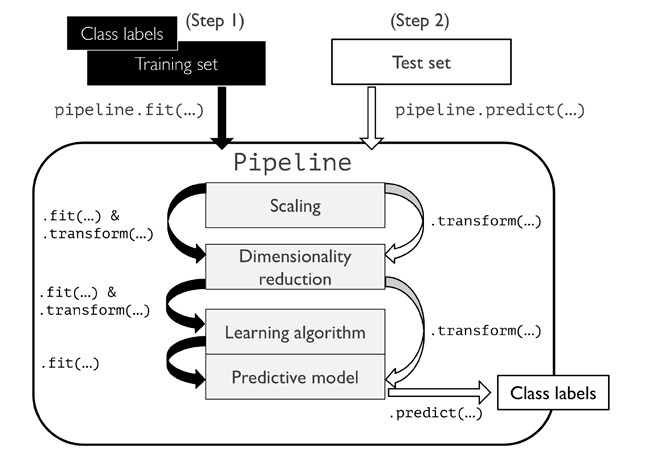

We can think of a scikit-learn Pipeline as a meta-estimator or wrapper around those individual
transformers and estimators.

## Using k-fold cross-validation to assess model performance :

common cross-validation techniques **holdout cross-validation**
and **k-fold cross-validation**

which can help us to obtain reliable estimates of the model’s generalization
performance, that is, how well the model performs on unseen data.

## The holdout method:
we split our initial dataset into separate
training and test datasets the former is used for model training, and the latter is used to estimate its
generalization performance

in typical machine learning applications, we are also interested
in tuning and comparing different parameter settings to further improve the performance for
making predictions on unseen data. This process is called **model selection** . if we reuse the same test dataset over and over again during
model selection, it will become part of our training data and thus the model will be more likely to
overfit. Despite this issue, many people still use the test dataset for model selection, which is not a
good machine learning practice.

A better way of using the holdout method for model selection is to separate the data into three parts:
**a training dataset, a validation dataset, and a test dataset**

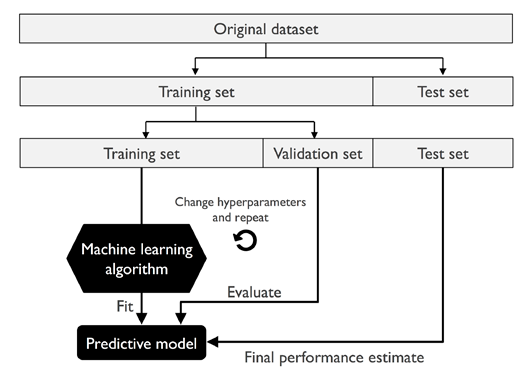



<span style="color: red">disadvantage of the holdout method is that the performance estimate may be very sensitive to how
we partition the training dataset into the training and validation subsets</span>


## K-fold cross-validation:
In k-fold cross-validation, we randomly split the training dataset into k folds without replacement.
Here, k – 1 folds, the so-called training folds, are used for the model training, and one fold, the so-called
test fold, is used for performance evaluation.This procedure is repeated k times so that we obtain k
models and performance estimates.

We then calculate the average performance of the models based on the different, independent test
folds to obtain a performance estimate that is less sensitive to the sub-partitioning of the training data
compared to the holdout method.

Typically, we use k-fold cross-validation for model tuning, that is,
finding the optimal hyperparameter values that yield a satisfying generalization performance, which
is estimated from evaluating the model performance on the test folds.

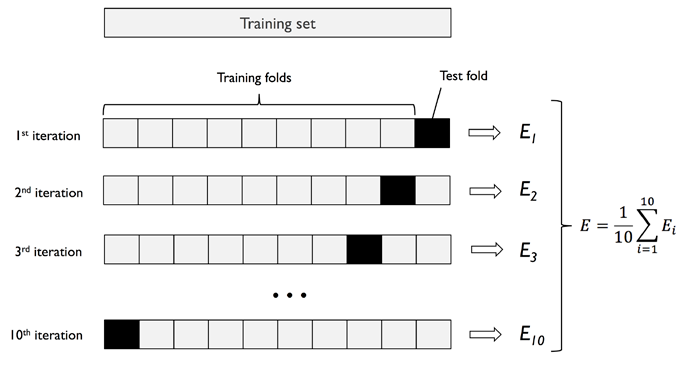

In summary, k-fold cross-validation makes better use of the dataset than the holdout method with a
validation set, since in k-fold cross-validation all data points are being used for evaluation.

***A good standard value for k in k-fold cross-validation is 10***

However, if we are working with relatively small training sets, it can be useful to increase the number
of folds. If we increase the value of k, more training data will be used in each iteration, which results
in a lower pessimistic bias toward estimating the generalization performance by averaging the individual
model estimates.

if we are working with large datasets, we can choose a smaller value
for k, for example, k = 5, and still obtain an accurate estimate of the average performance of the model
while reducing the computational cost of refitting and evaluating the model on the different folds.

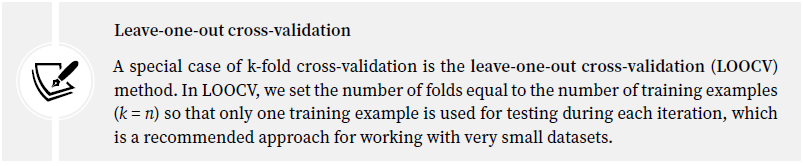 

A slight improvement over the standard k-fold cross-validation approach is **stratified k-fold cross-validation**,
which can yield better bias and variance estimates, especially in cases of unequal class proportions . the class label proportions are preserved in each fold to ensure
that each fold is representative of the class proportions in the training dataset

In [8]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
    

kfold = StratifiedKFold(n_splits=10).split(X_train, y_train)

scores = []
for k, (train, test) in enumerate(kfold):
    pipe_lr.fit(X_train[train], y_train[train])
    score = pipe_lr.score(X_train[test], y_train[test])
    scores.append(score)

    print(f'Fold: {k+1:02d}, '
          f'Class distr.: {np.bincount(y_train[train])}, '
          f'Acc.: {score:.3f}')
    
mean_acc = np.mean(scores)
std_acc = np.std(scores)
print(f'\nCV accuracy: {mean_acc:.3f} +/- {std_acc:.3f}')

Fold: 01, Class distr.: [256 153], Acc.: 0.935
Fold: 02, Class distr.: [256 153], Acc.: 0.935
Fold: 03, Class distr.: [256 153], Acc.: 0.957
Fold: 04, Class distr.: [256 153], Acc.: 0.957
Fold: 05, Class distr.: [256 153], Acc.: 0.935
Fold: 06, Class distr.: [257 153], Acc.: 0.956
Fold: 07, Class distr.: [257 153], Acc.: 0.978
Fold: 08, Class distr.: [257 153], Acc.: 0.933
Fold: 09, Class distr.: [257 153], Acc.: 0.956
Fold: 10, Class distr.: [257 153], Acc.: 0.956

CV accuracy: 0.950 +/- 0.014


Although the previous code example was useful to illustrate how k-fold cross-validation works, scikitlearn
also implements a k-fold cross-validation scorer, which allows us to evaluate our model using
stratified k-fold cross-validation less verbosely:

In [9]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator=pipe_lr,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=1)
print(f'CV accuracy scores: {scores}')
print(f'CV accuracy: {np.mean(scores):.3f} '
      f'+/- {np.std(scores):.3f}')

CV accuracy scores: [0.93478261 0.93478261 0.95652174 0.95652174 0.93478261 0.95555556
 0.97777778 0.93333333 0.95555556 0.95555556]
CV accuracy: 0.950 +/- 0.014


and by setting n_jobs=-1, we can use
all available CPUs on our machine to do the computation in parallel.

## Debugging algorithms with learning and validation curves:

two very simple yet powerful diagnostic tools that can help us to
improve the performance of a learning algorithm: **learning curves and validation curves**

By
plotting the model training and validation accuracies as functions of the training dataset size, we can
easily detect whether the model suffers from high variance or high bias, and whether the collection
of more data could help to address this problem.

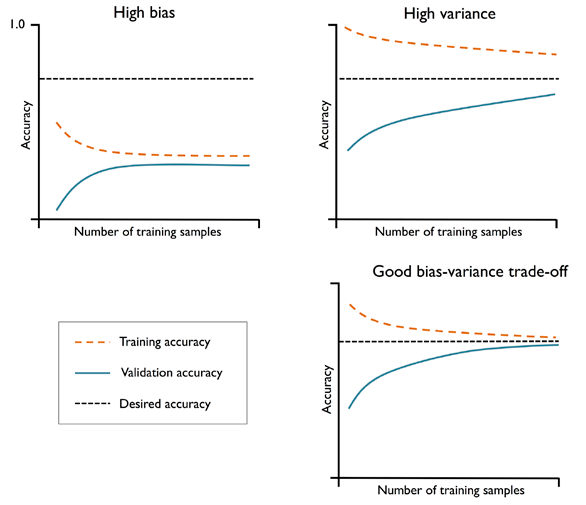

first see how we can use the learning curve function from scikit-learn to evaluate the model:

Classification → StratifiedKFold (default)

Regression → KFold

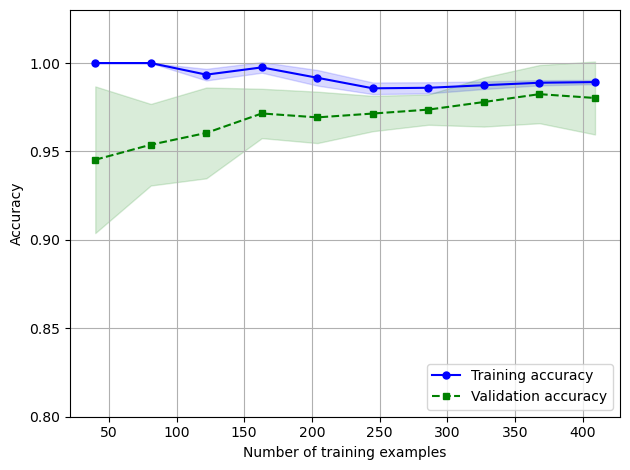

In [10]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve


pipe_lr = make_pipeline(StandardScaler(),
                        LogisticRegression(penalty='l2', max_iter=10000))

train_sizes, train_scores, test_scores =\
                learning_curve(estimator=pipe_lr,
                               X=X_train,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=10,
                               n_jobs=1)

train_mean = np.mean(train_scores, axis=1) #axis=1 → average across folds
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.03])
plt.tight_layout()
# plt.savefig('figures/06_05.png', dpi=300)
plt.show()

## Addressing over- and underfitting with validation curves:

Validation curves are a useful tool for improving the performance of a model by addressing issues such
as overfitting or underfitting

Validation curves are related to learning curves, but instead of plotting
the training and test accuracies as functions of the sample size, we vary the values of the model parameters

A validation curve shows how model performance changes when ONE hyperparameter changes.


**What does C mean in Logistic Regression?**

C = inverse of regularization strength

Small C → strong regularization → simpler model

Large C → weak regularization → more complex model

 Remember:

C ↓ → underfitting

C ↑ → overfitting

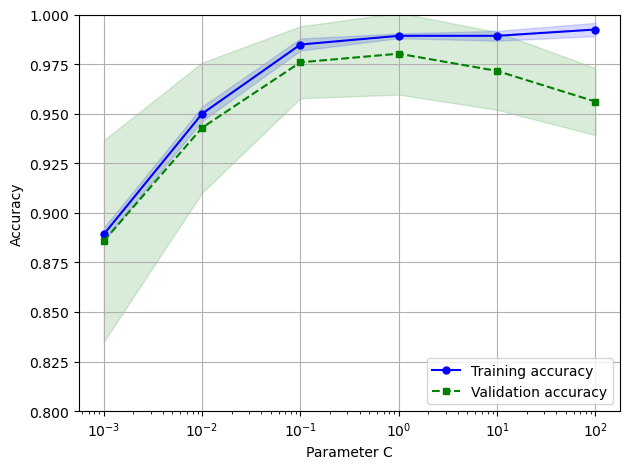

In [11]:
from sklearn.model_selection import validation_curve


param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
train_scores, test_scores = validation_curve(
                estimator=pipe_lr, 
                X=X_train, 
                y=y_train, 
                param_name='logisticregression__C', 
                param_range=param_range,
                cv=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='Training accuracy')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='Validation accuracy')

plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1.0])
plt.tight_layout()
# plt.savefig('figures/06_06.png', dpi=300)
plt.show()

## Fine-tuning machine learning models via grid search:

In machine learning, we have two types of parameters: those that are learned from the training data,
for example, the weights in logistic regression, and the parameters of a learning algorithm that are optimized
separately.

The latter are the tuning parameters (or hyperparameters) of a model.

**grid search**,:
 which can further help to improve the performance of a model
by finding the optimal combination of hyperparameter values.


| Aspect             | Grid Search  | Optuna                 |
| ------------------ | ------------ | ---------------------- |
| Search type        | Exhaustive   | Intelligent / Adaptive |
| Speed              | Slow         | Fast                   |
| Scalability        | Poor         | Excellent              |
| Learns from trials | No           | Yes                    |
| Best for           | Small models | Large / complex models |



## Tuning hyperparameters via grid search:



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

pipe_svc = make_pipeline(StandardScaler(),
                         SVC(random_state=1))

param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

param_grid = [{'svc__C': param_range, 
               'svc__kernel': ['linear']},
              {'svc__C': param_range, 
               'svc__gamma': param_range, 
               'svc__kernel': ['rbf']}]

gs = GridSearchCV(estimator=pipe_svc, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  refit=True,
                  cv=10,
                  n_jobs=-1) #n_jobs=-1 so that GridSearchCV can use all our processing cores to speed up
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.9846859903381642
{'svc__C': 100.0, 'svc__gamma': 0.001, 'svc__kernel': 'rbf'}


In [15]:

clf = gs.best_estimator_

# clf.fit(X_train, y_train) 
# note that we do not need to refit the classifier
# because this is done automatically via refit=True.

print(f'Test accuracy: {clf.score(X_test, y_test):.3f}')

Test accuracy: 0.974


## Exploring hyperparameter configurations more widely with randomized search:

Since grid search is an exhaustive search, it is guaranteed to find the optimal hyperparameter configuration
if it is contained in the user-specified parameter grid.

An alternative approach for sampling different
parameter combinations is **randomized search.**

In randomized search, we draw hyperparameter
configurations randomly from distributions (or discrete sets). In contrast to grid search, randomized
search does not do an exhaustive search over the hyperparameter space. Still, it allows us to explore a
wider range of hyperparameter value settings in a more cost- and time-effective manner.


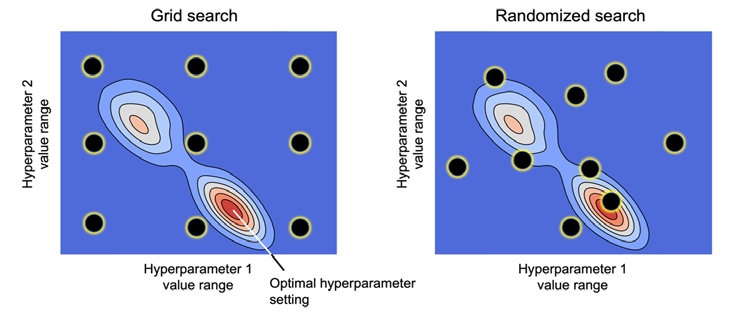


Let’s look at how we can use randomized search for tuning an SVM.


The main difference is that we can specify distributions as part of our parameter grid and specify
the total number of hyperparameter configurations to be evaluated.


Note that while RandomizedSearchCV can accept similar discrete lists of values as inputs for the parameter
grid, which is useful when considering categorical hyperparameters, its main power lies in
the fact that we can replace these lists with distributions to sample from.

In [ ]:
## param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

param_range = scipy.stats.loguniform(0.0001, 1000.0)
param_range.rvs(10)

# This will return 10 random numbers between 0.0001 and 1000, sampled on a logarithmic scale.

In [19]:
import scipy.stats


param_range = [0.0001, 0.001, 0.01, 0.1,
               1.0, 10.0, 100.0, 1000.0]

param_range = scipy.stats.loguniform(0.0001, 1000.0)

np.random.seed(1)
param_range.rvs(10)

array([8.30145146e-02, 1.10222804e+01, 1.00184520e-04, 1.30715777e-02,
       1.06485687e-03, 4.42965766e-04, 2.01289666e-03, 2.62376594e-02,
       5.98924832e-02, 5.91176467e-01])

In [20]:
from sklearn.model_selection import RandomizedSearchCV


pipe_svc = make_pipeline(
    StandardScaler(),
    SVC(random_state=1))

param_grid = [{'svc__C': param_range,
               'svc__kernel': ['linear']},
               
              {'svc__C': param_range,
               'svc__gamma': param_range,
               'svc__kernel': ['rbf']}]


rs = RandomizedSearchCV(estimator=pipe_svc,
                        param_distributions=param_grid,
                        scoring='accuracy',
                        refit=True,
                        n_iter=20,
                        cv=10,
                        random_state=1,
                        n_jobs=-1)

In [21]:
rs = rs.fit(X_train, y_train)
print(rs.best_score_)

0.9780676328502416


In [22]:
print(rs.best_params_)

{'svc__C': np.float64(0.05971247755848463), 'svc__kernel': 'linear'}


## More resource-efficient hyperparameter search with successive halving

Taking the idea of randomized search one step further, scikit-learn implements a successive halving
variant, **HalvingRandomSearchCV**, that makes finding suitable hyperparameter configurations more
efficient. Successive halving, given a large set of candidate configurations, successively throws out
unpromising hyperparameter configurations until only one configuration remains. We can summarize
the procedure via the following steps:

1. Draw a large set of candidate configurations via random sampling

2. Train the models with limited resources, for example, a small subset of the training data (as
opposed to using the entire training set)

3. Discard the bottom 50 percent based on predictive performance

4. Go back to step 2 with an increased amount of available resources

Note that there is also
a successive halving implementation for the grid search variant called **HalvingGridSearchCV**

**Train many models cheaply first, then spend more resources only on the promising ones.**

In [23]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV

| factor | Behavior                 |
| ------ | ------------------------ |
| 2      | Aggressive (discard 50%) |
| 1.5    | More conservative        |
| 3      | Very aggressive          |


In [ ]:
hs = HalvingRandomSearchCV(
    pipe_svc,
    param_distributions=param_grid,
    n_candidates='exhaust', #Generate as many candidate configurations as possible in the first iteration.
    resource='n_samples', #The cost of training increases with the number of training samples
    factor=1.5, #How aggressively models are discarded
    random_state=1,
    n_jobs=-1)

In [25]:
hs = hs.fit(X_train, y_train)
print(hs.best_score_)
print(hs.best_params_)

0.9617647058823529
{'svc__C': np.float64(4.934834261073333), 'svc__kernel': 'linear'}


In [26]:
clf = hs.best_estimator_
print(f'Test accuracy: {hs.score(X_test, y_test):.3f}')

Test accuracy: 0.982


## Why do we need nested cross-validation?

If you:

Tune hyperparameters using cross-validation

Report the best CV score

 you get an optimistically biased performance estimate, because the model was selected using the same data it was evaluated on.
 
**Nested CV fixes this**

## Algorithm selection with nested cross-validation:
Using k-fold cross-validation in combination with grid search or randomized search is a useful approach
for fine-tuning the performance of a machine learning model by varying its hyperparameter
values, as we saw in the previous subsections. If we want to select among different machine
learning algorithms, though, another recommended approach is **nested cross-validation.**


In nested cross-validation, we have an **outer k-fold** cross-validation loop to split the data into training
and test folds, and an **inner loop** is used to select the model using k-fold cross-validation on the training
fold. After model selection, the test fold is then used to evaluate the model performance

Outer CV  → performance estimation
Inner CV  → model / hyperparameter selection



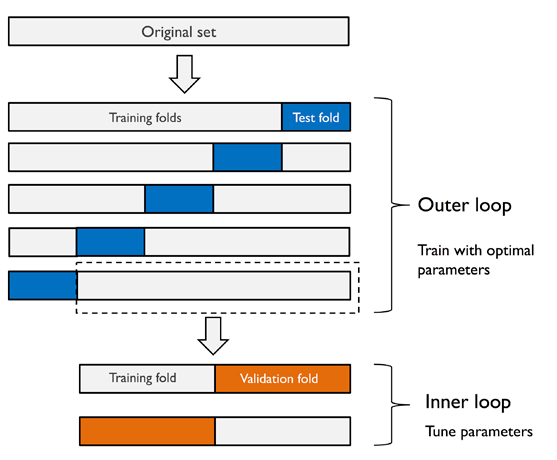


In [ ]:
param_range = [0.0001, 0.001, 0.01, 0.1,
               1.0, 10.0, 100.0, 1000.0]


param_grid = [{'svc__C': param_range, 
               'svc__kernel': ['linear']},
              {'svc__C': param_range, 
               'svc__gamma': param_range, 
               'svc__kernel': ['rbf']}]

## Inner loop : hyperparameter tuning (GridSearchCV, cv=2)
gs = GridSearchCV(estimator=pipe_svc,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=2)
#Outer loop → performance evaluation (cross_val_score, cv=5)
scores = cross_val_score(gs, X_train, y_train, 
                         scoring='accuracy', cv=5)
print(f'CV accuracy: {np.mean(scores):.3f} '
      f'+/- {np.std(scores):.3f}')

CV accuracy: 0.974 +/- 0.015


In [29]:
from sklearn.tree import DecisionTreeClassifier

gs = GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
                  param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, None]}],
                  scoring='accuracy',
                  cv=2)

scores = cross_val_score(gs, X_train, y_train, 
                         scoring='accuracy', cv=5)
print(f'CV accuracy: {np.mean(scores):.3f} '
      f'+/- {np.std(scores):.3f}')

CV accuracy: 0.934 +/- 0.016


## different performance evaluation metrics:

In the previous sections and chapters, we evaluated different machine learning models using prediction
accuracy, which is a useful metric with which to quantify the performance of a model in general.
However, there are several other performance metrics that can be used to measure a model’s relevance,
such as **precision, recall, the F1 score, and Matthews correlation coefficient (MCC).**

## confusion matrix:

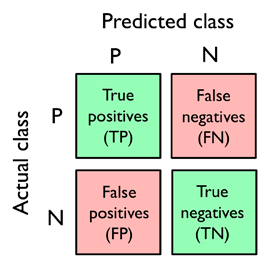


In [30]:
from sklearn.metrics import confusion_matrix

pipe_svc.fit(X_train, y_train)
y_pred = pipe_svc.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

[[71  1]
 [ 2 40]]


Note that the (true) class 0 examples that are correctly predicted as class 0 (true negatives) are now in the upper left corner of the matrix (index 0, 0). In order to change the ordering so that the true negatives are in the lower right corner (index 1,1) and the true positves are in the upper left, we can use the labels argument like shown below:

In [33]:
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred, labels=[1, 0])
print(confmat)

[[40  2]
 [ 1 71]]


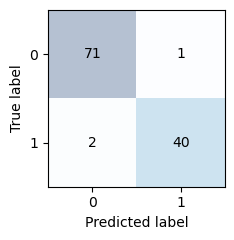

In [31]:
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
ax.xaxis.set_ticks_position('bottom')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
#plt.savefig('figures/06_09.png', dpi=300)
plt.show()

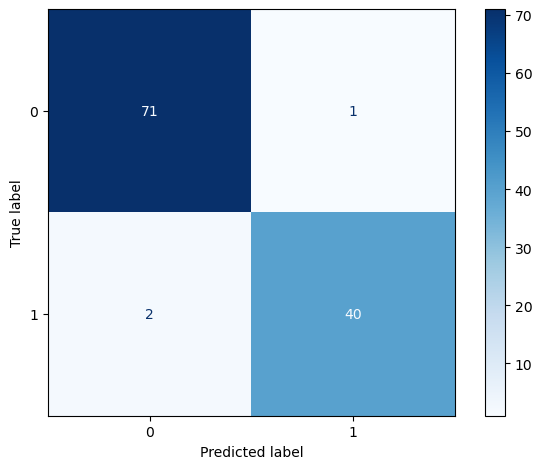

In [32]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred,
    cmap='Blues'
)

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()


## Optimizing the precision and recall of a classification model:

Both the prediction error (ERR) and accuracy (ACC) provide general information about how many
examples are misclassified. The error can be understood as the sum of all false predictions divided
by the number of total predictions, and the accuracy is calculated as the sum of correct predictions
divided by the total number of predictions, respectively:

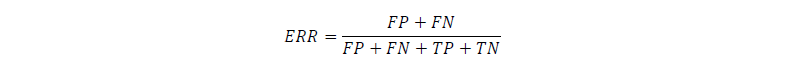

The prediction accuracy can then be calculated directly from the error:

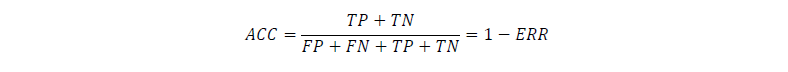

The true positive rate (TPR) and false positive rate (FPR) are performance metrics that are especially
useful for imbalanced class problems:

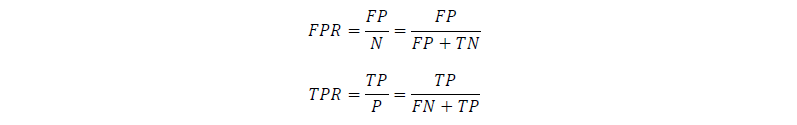

The performance metrics precision (PRE) and recall (REC) are related to those TP and TN rates, and
in fact, REC is synonymous with TPR:
recall quantifies how many of the relevant records (the positives) are captured as such
(the true positives).

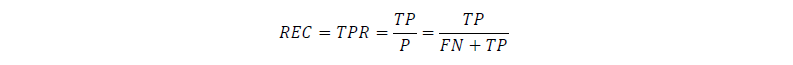

Precision quantifies how many of the records predicted as relevant (the sum of
true and false positives) are actually relevant (true positives)

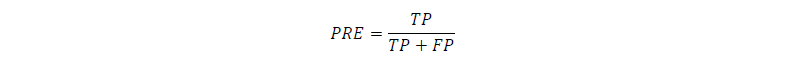

To balance the up- and downsides of optimizing PRE and REC, the harmonic mean of PRE and REC
is used, the so-called F1 score:

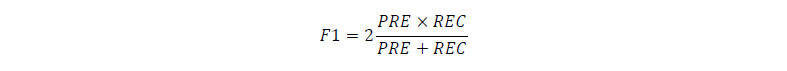

Lastly, a measure that summarizes a confusion matrix is the MCC, which is especially popular in
biological research contexts. The MCC is calculated as follows:

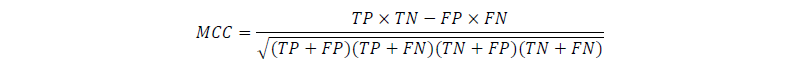

the MCC ranges between –1 and 1,


NOTES : 
### precision : 

Focus: False Positives (FP)

**Use Precision when:**

A false alarm is expensive

You only want very confident positives

### Recall:

Focus: False Negatives (FN)

**Use Recall when:**

Missing a positive case is dangerous

You want to catch everything, even if noisy

### F1-score:

**Use F1-score when:**

Classes are imbalanced

Both FP and FN matter

You want one number to compare models


----------------------------------
Precision → “Am I lying when I say YES?”

Recall → “Did I miss someone important?”

F1 → “Am I balanced?”


In [34]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import matthews_corrcoef

pre_val = precision_score(y_true=y_test, y_pred=y_pred)
print(f'Precision: {pre_val:.3f}')

rec_val = recall_score(y_true=y_test, y_pred=y_pred)
print(f'Recall: {rec_val:.3f}')

f1_val = f1_score(y_true=y_test, y_pred=y_pred)
print(f'F1: {f1_val:.3f}')

mcc_val = matthews_corrcoef(y_true=y_test, y_pred=y_pred)
print(f'MCC: {mcc_val:.3f}')

Precision: 0.976
Recall: 0.952
F1: 0.964
MCC: 0.943


Remember that the positive class in scikit-learn is the class that is labeled as class 1. If we want to
specify a different positive label, we can construct our own scorer via the make_scorer function, which
we can then directly provide as an argument to the scoring parameter in GridSearchCV (in this example,
using the f1_score as a metric):

In [35]:
from sklearn.metrics import make_scorer

scorer = make_scorer(f1_score, pos_label=0)

c_gamma_range = [0.01, 0.1, 1.0, 10.0]

param_grid = [{'svc__C': c_gamma_range,
               'svc__kernel': ['linear']},
              {'svc__C': c_gamma_range,
               'svc__gamma': c_gamma_range,
               'svc__kernel': ['rbf']}]

gs = GridSearchCV(estimator=pipe_svc,
                  param_grid=param_grid,
                  scoring=scorer,
                  cv=10,
                  n_jobs=-1)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.9861994953378878
{'svc__C': 10.0, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}


## Plotting a receiver operating characteristic (ROC):

graphs are useful tools to select models for classification
based on their performance with respect to the FPR and TPR, which are computed by shifting the
decision threshold of the classifier. The diagonal of a ROC graph can be interpreted as random guessing,
and classification models that fall below the diagonal are considered as worse than random guessing.
A perfect classifier would fall into the top-left corner of the graph with a TPR of 1 and an FPR of 0.
Based on the ROC curve, we can then compute the so-called ROC area under the curve (ROC AUC) to
characterize the performance of a classification model.

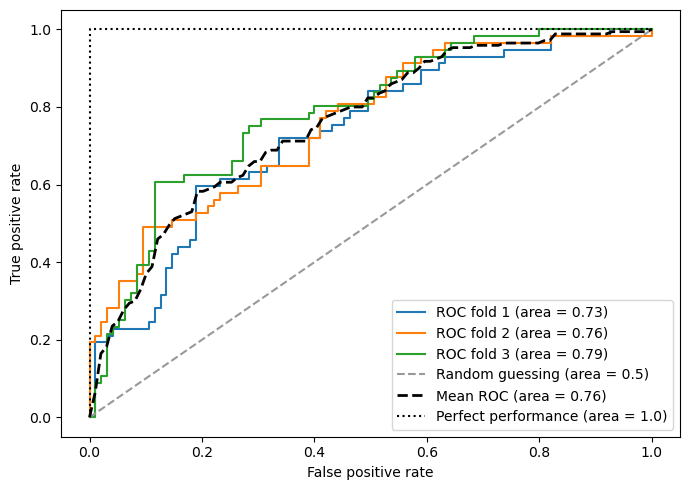

In [36]:
from sklearn.metrics import roc_curve, auc
from numpy import interp


pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components=2),
                        LogisticRegression(penalty='l2', 
                                           random_state=1,
                                           solver='lbfgs',
                                           C=100.0))

X_train2 = X_train[:, [4, 14]]
    

cv = list(StratifiedKFold(n_splits=3).split(X_train, y_train))

fig = plt.figure(figsize=(7, 5))

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for i, (train, test) in enumerate(cv):
    probas = pipe_lr.fit(X_train2[train],
                         y_train[train]).predict_proba(X_train2[test])

    fpr, tpr, thresholds = roc_curve(y_train[test],
                                     probas[:, 1],
                                     pos_label=1)
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr,
             tpr,
             label=f'ROC fold {i+1} (area = {roc_auc:.2f})')

plt.plot([0, 1],
         [0, 1],
         linestyle='--',
         color=(0.6, 0.6, 0.6),
         label='Random guessing (area = 0.5)')

mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label=f'Mean ROC (area = {mean_auc:.2f})', lw=2)
plt.plot([0, 0, 1],
         [0, 1, 1],
         linestyle=':',
         color='black',
         label='Perfect performance (area = 1.0)')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='lower right')

plt.tight_layout()
# plt.savefig('figures/06_10.png', dpi=300)
plt.show()

## Scoring metrics for multiclass classification:

The scoring metrics that we’ve discussed so far are specific to binary classification systems.scikit-learn also implements macro and micro averaging methods to extend those scoring metrics
to multiclass problems via one-vs.-all (OvA) classification.The micro-average is calculated from the
individual TPs, TNs, FPs, and FNs of the system. For example, the micro-average of the precision score
in a k-class system can be calculated as follows:

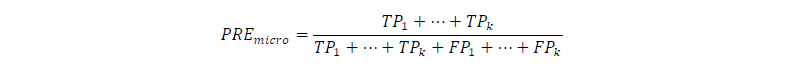

The macro-average is simply calculated as the average scores of the different systems:

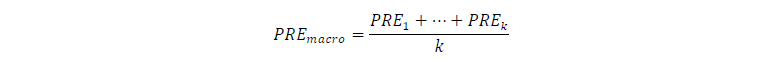

Micro-averaging is useful if we want to weight each instance or prediction equally, whereas macro-averaging
weights all classes equally to evaluate the overall performance of a classifier with regard to
the most frequent class labels.


If we are using binary performance metrics to evaluate multiclass classification models in scikit-learn,
a normalized or weighted variant of the macro-average is used by default. The weighted macro-average
is calculated by weighting the score of each class label by the number of true instances when
calculating the average. The weighted macro-average is useful if we are dealing with class imbalances,
that is, different numbers of instances for each label.

While the weighted macro-average is the default for multiclass problems in scikit-learn, we can specify
the averaging method via the average parameter inside the different scoring functions that we import
from the sklearn.metrics module, for example, the precision_score or make_scorer functions:

In [37]:
pre_scorer = make_scorer(score_func=precision_score, 
                         pos_label=1, 
                         greater_is_better=True, 
                         average='micro')

## Dealing with class imbalance:


In [39]:
X_imb = np.vstack((x[y == 0], x[y == 1][:40]))
y_imb = np.hstack((y[y == 0], y[y == 1][:40]))

In [40]:
y_pred = np.zeros(y_imb.shape[0])
np.mean(y_pred == y_imb) * 100

np.float64(89.92443324937027)

One way to deal with imbalanced class proportions during model fitting is to assign a larger penalty
to wrong predictions on the minority class. Via scikit-learn, adjusting such a penalty is as convenient
as setting the class_weight parameter to class_weight='balanced', which is implemented for most
classifiers.

Mistakes on the minority class should “cost more” than mistakes on the majority class.

The scikit-learn library implements a simple resample function that can help with the upsampling of
the minority class by drawing new samples from the dataset with replacement.

In [41]:
from sklearn.utils import resample

print('Number of class 1 examples before:', X_imb[y_imb == 1].shape[0])

X_upsampled, y_upsampled = resample(X_imb[y_imb == 1],
                                    y_imb[y_imb == 1],
                                    replace=True,
                                    n_samples=X_imb[y_imb == 0].shape[0],
                                    random_state=123)

print('Number of class 1 examples after:', X_upsampled.shape[0])

Number of class 1 examples before: 40
Number of class 1 examples after: 357


In [42]:
X_bal = np.vstack((x[y == 0], X_upsampled))
y_bal = np.hstack((y[y == 0], y_upsampled))

In [43]:
y_pred = np.zeros(y_bal.shape[0])
np.mean(y_pred == y_bal) * 100

np.float64(50.0)